# Prism Data

In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import re

In [2]:
inflows = pd.read_parquet('/uss/hdsi-prismdata/q1-ucsd-inflows.pqt')

In [3]:
outflows = pd.read_parquet('/uss/hdsi-prismdata/q1-ucsd-outflows.pqt')

In [4]:
inflows.head(5)

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,PAYCHECK,2477.02,2022-03-18,PAYCHECK
1,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-10-25,EXTERNAL_TRANSFER
2,0,acc_0,MISCELLANEOUS,6.29,2022-08-26,MISCELLANEOUS
3,0,acc_0,EXTERNAL_TRANSFER,277.00,2022-06-03,EXTERNAL_TRANSFER
4,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-07-29,EXTERNAL_TRANSFER


In [5]:
outflows.head(5)

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,LOAN,900.60,2022-07-05,LOAN
1,0,acc_0,ATM_CASH,80.00,2022-03-25,ATM_CASH
2,0,acc_0,TST* Casa Del Rio - Exp Fairlawn OH 09/24,18.42,2022-09-26,FOOD_AND_BEVERAGES
3,0,acc_0,LOAN,634.00,2023-01-10,LOAN
4,0,acc_0,Buffalo Wild Wings,26.47,2022-09-12,FOOD_AND_BEVERAGES


## Data Exploration

*inflows*

In [6]:
inflows['prism_consumer_id'].nunique()

2974

In [7]:
inflows['memo'].value_counts()

memo
EXTERNAL_TRANSFER        156533
SELF_TRANSFER            110437
DEPOSIT                   61345
MISCELLANEOUS             55648
PAYCHECK                  33138
PAYCHECK_PLACEHOLDER      26087
REFUND                    23220
INVESTMENT_INCOME         17325
SMALL_DOLLAR_ADVANCE      13621
OTHER_BENEFITS             7708
TAX                        3405
LOAN                       2513
UNEMPLOYMENT_BENEFITS      1961
INSURANCE                   174
Name: count, dtype: int64

In [8]:
inflows[inflows['memo'] == inflows['category']]

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,PAYCHECK,2477.02,2022-03-18,PAYCHECK
1,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-10-25,EXTERNAL_TRANSFER
2,0,acc_0,MISCELLANEOUS,6.29,2022-08-26,MISCELLANEOUS
3,0,acc_0,EXTERNAL_TRANSFER,277.00,2022-06-03,EXTERNAL_TRANSFER
4,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-07-29,EXTERNAL_TRANSFER
...,...,...,...,...,...,...
513110,5941,acc_9524,EXTERNAL_TRANSFER,8.66,2023-01-21,EXTERNAL_TRANSFER
513111,5941,acc_9524,EXTERNAL_TRANSFER,267.13,2023-01-23,EXTERNAL_TRANSFER
513112,5941,acc_9524,EXTERNAL_TRANSFER,2.00,2023-01-24,EXTERNAL_TRANSFER
513113,5941,acc_9524,EXTERNAL_TRANSFER,207.16,2023-01-24,EXTERNAL_TRANSFER


In [9]:
len(inflows)

513115

In [10]:
inflows['memo'].nunique()

14

In [11]:

inflows['category'].nunique()

14

**Number of unique merchants in each category**

In [12]:
 inflows[['category','memo']].groupby('category').nunique()

,memo
category,
DEPOSIT,1
EXTERNAL_TRANSFER,1
INSURANCE,1
INVESTMENT_INCOME,1
LOAN,1
MISCELLANEOUS,1
OTHER_BENEFITS,1
PAYCHECK,1
PAYCHECK_PLACEHOLDER,1


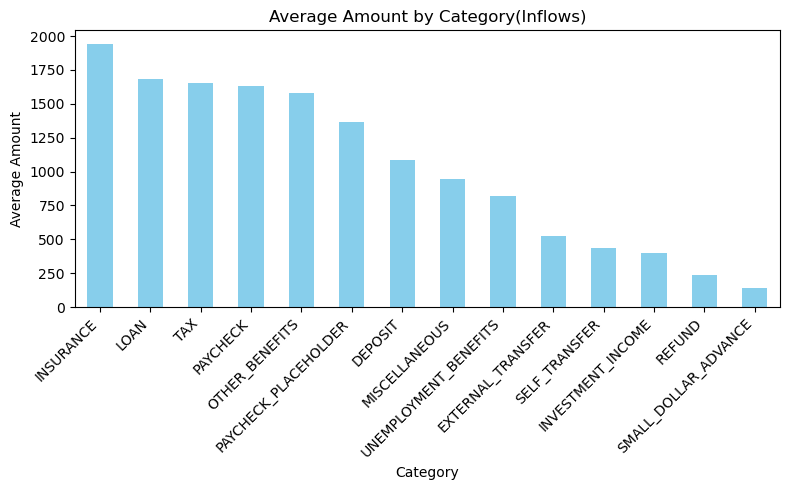

In [13]:
import matplotlib.pyplot as plt

avg_by_category = inflows.groupby('category')['amount'].mean().sort_values(ascending=False)


avg_by_category.plot(kind='bar', color='skyblue', figsize=(8,5))

plt.title('Average Amount by Category(Inflows)')
plt.xlabel('Category')
plt.ylabel('Average Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

*outflows*

In [14]:
outflows['memo'].value_counts()

memo
EXTERNAL_TRANSFER                                                                    320998
AUTOMOTIVE                                                                           208579
ATM_CASH                                                                             117651
UNCATEGORIZED                                                                        117409
LOAN                                                                                  90945
                                                                                      ...  
Par Gators Dockside -                                                                     1
Chilis Mandarin                                                                           1
Chilis Bay Meadows                                                                        1
Southside Liquor                                                                          1
POS WITHDRAWALWAL-MART #XXXX XXXX E MCKELLIPS RD MESA AZ  Card 15 #XXXX  MC

In [15]:
list(outflows['category'].unique())

['LOAN',
 'ATM_CASH',
 'FOOD_AND_BEVERAGES',
 'ENTERTAINMENT',
 'GENERAL_MERCHANDISE',
 'ESSENTIAL_SERVICES',
 'GROCERIES',
 'EXTERNAL_TRANSFER',
 'AUTOMOTIVE',
 'UNCATEGORIZED',
 'CREDIT_CARD_PAYMENT',
 'SELF_TRANSFER',
 'PETS',
 'HEALTHCARE_MEDICAL',
 'INSURANCE',
 'ACCOUNT_FEES',
 'HOME_IMPROVEMENT',
 'TRAVEL',
 'MORTGAGE',
 'OVERDRAFT',
 'EDUCATION',
 'RENT',
 'TAX',
 'CHILD_DEPENDENTS',
 'GIFTS_DONATIONS',
 'BILLS_UTILITIES',
 'PAYCHECK',
 'BNPL',
 'AUTO_LOAN']

In [16]:
outflows[outflows['category'] == 'BILLS_UTILITIES']['memo'].unique()

array(['BILLS_UTILITIES'], dtype=object)

**Uncategorized Category**

In [17]:
outflows[outflows['category'] == 'UNCATEGORIZED']

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
27,0,acc_0,UNCATEGORIZED,310.64,2022-02-22,UNCATEGORIZED
65,0,acc_0,UNCATEGORIZED,150.00,2022-03-11,UNCATEGORIZED
75,0,acc_0,UNCATEGORIZED,2.20,2022-08-01,UNCATEGORIZED
84,0,acc_0,UNCATEGORIZED,405.65,2022-03-29,UNCATEGORIZED
119,0,acc_0,UNCATEGORIZED,547.84,2022-08-23,UNCATEGORIZED
...,...,...,...,...,...,...
2597446,5941,acc_9524,UNCATEGORIZED,251.51,2023-01-13,UNCATEGORIZED
2597463,5941,acc_9524,UNCATEGORIZED,804.27,2023-01-18,UNCATEGORIZED
2597467,5941,acc_9524,UNCATEGORIZED,39.64,2023-01-19,UNCATEGORIZED
2597472,5941,acc_9524,UNCATEGORIZED,0.00,2023-01-20,UNCATEGORIZED


In [18]:
outflows[['category','memo']].groupby('category').nunique()

,memo
category,
ACCOUNT_FEES,1
ATM_CASH,1
AUTOMOTIVE,1
AUTO_LOAN,1
BILLS_UTILITIES,1
BNPL,1
CHILD_DEPENDENTS,1
CREDIT_CARD_PAYMENT,1
EDUCATION,2122


In [19]:
outflows['memo'].value_counts()

memo
EXTERNAL_TRANSFER                                                                    320998
AUTOMOTIVE                                                                           208579
ATM_CASH                                                                             117651
UNCATEGORIZED                                                                        117409
LOAN                                                                                  90945
                                                                                      ...  
Par Gators Dockside -                                                                     1
Chilis Mandarin                                                                           1
Chilis Bay Meadows                                                                        1
Southside Liquor                                                                          1
POS WITHDRAWALWAL-MART #XXXX XXXX E MCKELLIPS RD MESA AZ  Card 15 #XXXX  MC

In [20]:
list(outflows['category'].unique())

['LOAN',
 'ATM_CASH',
 'FOOD_AND_BEVERAGES',
 'ENTERTAINMENT',
 'GENERAL_MERCHANDISE',
 'ESSENTIAL_SERVICES',
 'GROCERIES',
 'EXTERNAL_TRANSFER',
 'AUTOMOTIVE',
 'UNCATEGORIZED',
 'CREDIT_CARD_PAYMENT',
 'SELF_TRANSFER',
 'PETS',
 'HEALTHCARE_MEDICAL',
 'INSURANCE',
 'ACCOUNT_FEES',
 'HOME_IMPROVEMENT',
 'TRAVEL',
 'MORTGAGE',
 'OVERDRAFT',
 'EDUCATION',
 'RENT',
 'TAX',
 'CHILD_DEPENDENTS',
 'GIFTS_DONATIONS',
 'BILLS_UTILITIES',
 'PAYCHECK',
 'BNPL',
 'AUTO_LOAN']

In [21]:

outflows[outflows['category'] == 'BILLS_UTILITIES']['memo'].unique()

array(['BILLS_UTILITIES'], dtype=object)

**Uncategorized Transactions**

In [22]:

outflows[outflows['category'] == 'UNCATEGORIZED']

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
27,0,acc_0,UNCATEGORIZED,310.64,2022-02-22,UNCATEGORIZED
65,0,acc_0,UNCATEGORIZED,150.00,2022-03-11,UNCATEGORIZED
75,0,acc_0,UNCATEGORIZED,2.20,2022-08-01,UNCATEGORIZED
84,0,acc_0,UNCATEGORIZED,405.65,2022-03-29,UNCATEGORIZED
119,0,acc_0,UNCATEGORIZED,547.84,2022-08-23,UNCATEGORIZED
...,...,...,...,...,...,...
2597446,5941,acc_9524,UNCATEGORIZED,251.51,2023-01-13,UNCATEGORIZED
2597463,5941,acc_9524,UNCATEGORIZED,804.27,2023-01-18,UNCATEGORIZED
2597467,5941,acc_9524,UNCATEGORIZED,39.64,2023-01-19,UNCATEGORIZED
2597472,5941,acc_9524,UNCATEGORIZED,0.00,2023-01-20,UNCATEGORIZED


In [23]:
outflows[['category','memo']].groupby('category').nunique()

,memo
category,
ACCOUNT_FEES,1
ATM_CASH,1
AUTOMOTIVE,1
AUTO_LOAN,1
BILLS_UTILITIES,1
BNPL,1
CHILD_DEPENDENTS,1
CREDIT_CARD_PAYMENT,1
EDUCATION,2122


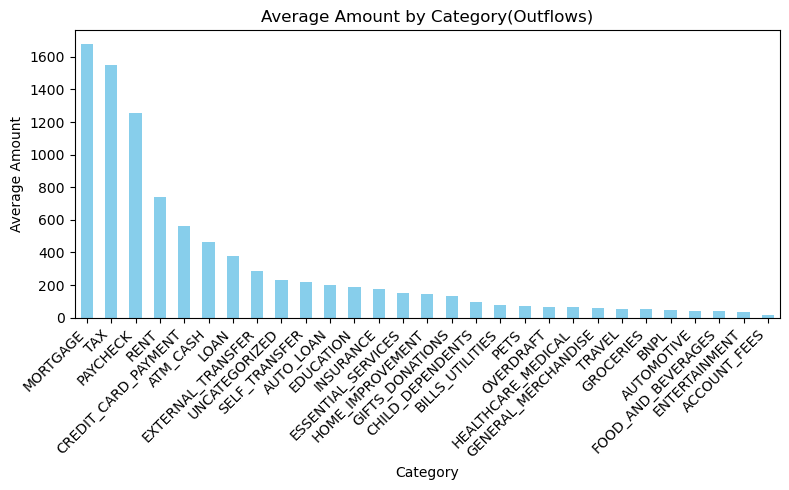

In [24]:
import matplotlib.pyplot as plt

avg_by_category = outflows.groupby('category')['amount'].mean().sort_values(ascending=False)


avg_by_category.plot(kind='bar', color='skyblue', figsize=(8,5))

plt.title('Average Amount by Category(Outflows)')
plt.xlabel('Category')
plt.ylabel('Average Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [25]:
# double checking 

# outflows[outflows['category']=='TAX']

In [26]:
merchant_cat = ['EDUCATION', 'FOOD_AND_BEVERAGES', 'GENERAL_MERCHANDISE', 'GROCERIES', 'MORTGAGE','OVERDRAFT', 'PETS', 'RENT', 'TRAVEL']

In [27]:
merchant_df = outflows[outflows['category'].isin(merchant_cat)][['category','memo']].reset_index()
merchant_df

,index,category,memo
0,2,FOOD_AND_BEVERAGES,TST* Casa Del Rio - Exp Fairlawn OH 09/24
1,4,FOOD_AND_BEVERAGES,Buffalo Wild Wings
2,6,GENERAL_MERCHANDISE,Oculus CA 04/16
3,7,FOOD_AND_BEVERAGES,LOS GIRASOLES STOW OH 03/08
4,8,GENERAL_MERCHANDISE,BUZZIS LAUNDRY 1 OH 03/28
...,...,...,...
1306447,2597457,GENERAL_MERCHANDISE,DEBIT CARD WITHDRAWAL PURCHASEAmazon Prime*TI4...
1306448,2597462,EDUCATION,POS WITHDRAWALAZ LOT QUIKTRIP XXXX XXXX E INDI...
1306449,2597465,FOOD_AND_BEVERAGES,POS WITHDRAWALWAL-MART #XXXX XXXX E MCKELLIPS ...
1306450,2597468,FOOD_AND_BEVERAGES,WITHDRAWAL Salt River ProjeTYPE: ONLINE PMT CO...


In [28]:
merchant_df.groupby(['category','memo']).count().sort_values(by=['category','index'], ascending=False).groupby('category').head(3)

index
category            memo                                                     
TRAVEL              Uber                                                 7989
                    Uber Eats                                            5691
                    Lyft                                                 4648
RENT                SOUTHERN INVESTO WEB PMTS                              47
                    NEWREZ-SHELLPOIN WEB PMTS XXXXXXXXXX WEB ID: XX...     37
                    CHECKCARD XXXX GRACELAND RENTAL XXX-XXXXXXX KY ...     30
PETS                PetSmart                                             1450
                    CHEWY.COM                                             255
                    Pet Supplies Plus                                     228
OVERDRAFT           Overdraft Item Fee                                    374
                    OVERDRAFT ITEM CHARGE                                 191
                    OVERDRAFT PROTECTION TO XXXXXXXXXXXXXX                180
MORTGAGE            HUNTINGTON MORTG ONLINE PMT XXXXXX                     52
                    FREEDOM MTG PYMTS                                      45
                    WELLS FARGO HOME MORTGAGE Bill Payment                 35
GROCERIES           Walmart                                             31619
                    Kroger                                               8423
                    Target                                               8343
GENERAL_MERCHANDISE Amazon                                              31725
                    7-Eleven                                            11675
                    Circle K                                            10148
FOOD_AND_BEVERAGES  McDonald's                                          22670
                    Starbucks                                           12777
                    Chick-fil-A                                          7933
EDUCATION           Teacherspayteachers.com                                90
                    CHECKCARD XXXX BETMGM PLAY+ LAS VEGAS NV XXXXXX...     82
                    Mms University Of Maryl                                59

## Chosen Categories(5)

- **FOOD_AND_BEVERAGES**
- **GENERAL_MERCHANDISE**
- **GROCERIES**
- **PETS**
- **TRAVEL**

In [29]:
chosen_cat = ['FOOD_AND_BEVERAGES', 'GENERAL_MERCHANDISE', 'GROCERIES', 'PETS', 'TRAVEL']

In [30]:
chosen_df = outflows[outflows['category'].isin(chosen_cat)][['category','memo']].reset_index()
chosen_df.groupby(['category','memo']).count().sort_values(by=['category','index'], ascending=False).groupby('category').head(3)

index
category            memo                    
TRAVEL              Uber                7989
                    Uber Eats           5691
                    Lyft                4648
PETS                PetSmart            1450
                    CHEWY.COM            255
                    Pet Supplies Plus    228
GROCERIES           Walmart            31619
                    Kroger              8423
                    Target              8343
GENERAL_MERCHANDISE Amazon             31725
                    7-Eleven           11675
                    Circle K           10148
FOOD_AND_BEVERAGES  McDonald's         22670
                    Starbucks          12777
                    Chick-fil-A         7933

In [31]:
import pandas as pd

filtered_df = outflows[outflows['category'].isin(chosen_cat)]


avg_per_category = filtered_df.groupby('category')['amount'].mean()


highest_avg_category = avg_per_category.idxmax()
highest_avg_amount = avg_per_category.max()

print(f"Category with highest average amount: {highest_avg_category}")
print(f"Average amount: {highest_avg_amount:.2f}")

print("\nAverage amount per category:")
print(avg_per_category)


Category with highest average amount: PETS
Average amount: 72.11

Average amount per category:
category
FOOD_AND_BEVERAGES     40.564988
GENERAL_MERCHANDISE    57.821981
GROCERIES              51.450581
PETS                   72.111759
TRAVEL                 55.842056
Name: amount, dtype: float64


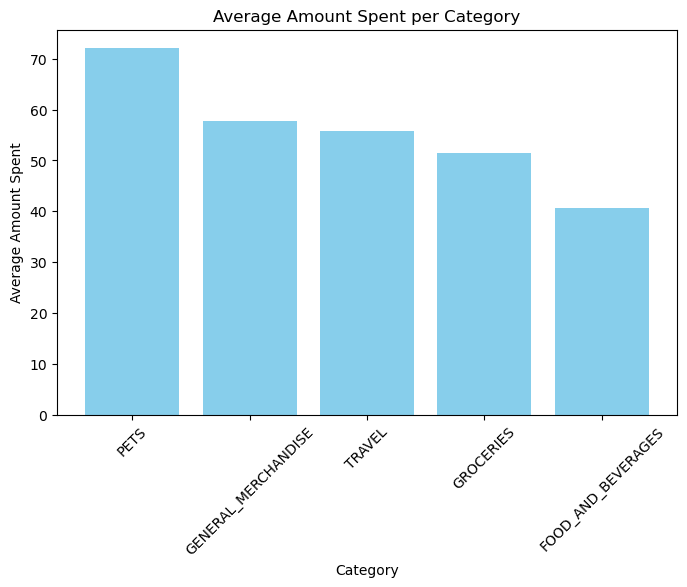

In [32]:
import matplotlib.pyplot as plt

avg_per_category = filtered_df.groupby('category')['amount'].mean()


avg_per_category_sorted = avg_per_category.sort_values(ascending=False)

plt.figure(figsize=(8,5))
plt.bar(avg_per_category_sorted.index, avg_per_category_sorted.values, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Average Amount Spent')
plt.title('Average Amount Spent per Category')
plt.xticks(rotation=45)
plt.show()


 ***Most Common Merchants by Category (Top 3)***


- **`TRAVEL`** :`Uber, Uber Eats, Lyft`
-  **`PETS`**  : `PetSmart, CHEWY.COM, Pet Supplies Plus`
- **`GROCERIES`** : `Walmart, Kroger, Target`
- **`GENERAL_MERCHANDISE`**: `Amazon, 7-Eleven, Circle K`
- **`FOOD_AND_BEVERAGES`** : `McDonald's, Starbucks, Chick-fil-a`

## Train-Test Split 

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
inflows

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,PAYCHECK,2477.02,2022-03-18,PAYCHECK
1,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-10-25,EXTERNAL_TRANSFER
2,0,acc_0,MISCELLANEOUS,6.29,2022-08-26,MISCELLANEOUS
3,0,acc_0,EXTERNAL_TRANSFER,277.00,2022-06-03,EXTERNAL_TRANSFER
4,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-07-29,EXTERNAL_TRANSFER
...,...,...,...,...,...,...
513110,5941,acc_9524,EXTERNAL_TRANSFER,8.66,2023-01-21,EXTERNAL_TRANSFER
513111,5941,acc_9524,EXTERNAL_TRANSFER,267.13,2023-01-23,EXTERNAL_TRANSFER
513112,5941,acc_9524,EXTERNAL_TRANSFER,2.00,2023-01-24,EXTERNAL_TRANSFER
513113,5941,acc_9524,EXTERNAL_TRANSFER,207.16,2023-01-24,EXTERNAL_TRANSFER


In [35]:
inflows_consumers = inflows['prism_consumer_id'].unique()
inflows_consumers

array([   0,    2,    4, ..., 5939, 5940, 5941])

In [36]:
in_train_users, in_test_users = train_test_split(inflows_consumers, test_size=0.2)#, random_state=42)
len(in_train_users), len(in_test_users)

(2379, 595)

In [37]:
595/2379

0.25010508617065996

In [38]:
in_train_df = inflows[inflows['prism_consumer_id'].isin(in_train_users)]
in_test_df = inflows[inflows['prism_consumer_id'].isin(in_test_users)]

In [39]:
in_train_df

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,PAYCHECK,2477.02,2022-03-18,PAYCHECK
1,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-10-25,EXTERNAL_TRANSFER
2,0,acc_0,MISCELLANEOUS,6.29,2022-08-26,MISCELLANEOUS
3,0,acc_0,EXTERNAL_TRANSFER,277.00,2022-06-03,EXTERNAL_TRANSFER
4,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-07-29,EXTERNAL_TRANSFER
...,...,...,...,...,...,...
513110,5941,acc_9524,EXTERNAL_TRANSFER,8.66,2023-01-21,EXTERNAL_TRANSFER
513111,5941,acc_9524,EXTERNAL_TRANSFER,267.13,2023-01-23,EXTERNAL_TRANSFER
513112,5941,acc_9524,EXTERNAL_TRANSFER,2.00,2023-01-24,EXTERNAL_TRANSFER
513113,5941,acc_9524,EXTERNAL_TRANSFER,207.16,2023-01-24,EXTERNAL_TRANSFER


In [40]:

in_test_df

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
893,12,acc_27,EXTERNAL_TRANSFER,300.00,2021-04-14,EXTERNAL_TRANSFER
894,12,acc_28,DEPOSIT,1952.52,2020-12-15,DEPOSIT
895,12,acc_29,INVESTMENT_INCOME,0.32,2021-03-31,INVESTMENT_INCOME
896,12,acc_28,EXTERNAL_TRANSFER,2000.00,2021-05-07,EXTERNAL_TRANSFER
897,12,acc_27,EXTERNAL_TRANSFER,300.00,2021-01-19,EXTERNAL_TRANSFER
...,...,...,...,...,...,...
511989,5929,acc_9512,PAYCHECK,743.44,2022-12-28,PAYCHECK
511990,5929,acc_9512,PAYCHECK,728.89,2023-01-10,PAYCHECK
511991,5929,acc_9512,DEPOSIT,10.00,2023-01-13,DEPOSIT
511992,5929,acc_9512,PAYCHECK,728.89,2023-01-24,PAYCHECK


In [41]:
len(in_train_df), len(in_test_df)

(410270, 102845)

In [42]:
99026/414089

0.2391418269985438

In [43]:
in_train_df.groupby('prism_consumer_id').size().mean(), in_test_df.groupby('prism_consumer_id').size().mean()

(172.45481294661622, 172.84873949579833)

In [44]:
in_train_df['amount'].mean(), in_test_df['amount'].mean()

(766.2527967679821, 608.8283942826583)

In [45]:

in_train_df['amount'].median(), in_test_df['amount'].median()

(100.0, 100.0)


*outflows*

In [46]:
outflows_consumers = outflows['prism_consumer_id'].unique()
outflows_consumers 


array([   0,    2,    4, ..., 5939, 5940, 5941])

In [47]:
out_train_users, out_test_users = train_test_split(outflows_consumers, test_size=0.2, random_state=42)
len(out_train_users), len(out_test_users)

(2374, 594)

In [48]:
594/2374

0.2502106149957877

In [49]:
out_train_df = outflows[outflows['prism_consumer_id'].isin(out_train_users)]
out_test_df = outflows[outflows['prism_consumer_id'].isin(out_test_users)]
len(out_train_df), len(out_test_df)


(2097805, 499683)

In [50]:
len(out_test_df)/len(out_train_df)

0.23819325437779013

In [51]:
out_train_df.groupby('prism_consumer_id').size().mean(), out_test_df.groupby('prism_consumer_id').size().mean()


(883.6583824768323, 841.2171717171717)

In [52]:
out_train_df['amount'].mean(), out_test_df['amount'].mean()

(138.0927030586732, 174.65576219323057)

In [53]:
results = []

for i in range(10):
    consumers = outflows['prism_consumer_id'].unique()
    train_consumers, test_consumers = train_test_split(consumers, test_size=0.2, random_state=i)

    # create train/test
    out_train_df = outflows[outflows['prism_consumer_id'].isin(train_consumers)]
    out_test_df = outflows[outflows['prism_consumer_id'].isin(test_consumers)]

    train_mean = out_train_df['amount'].mean()
    test_mean = out_test_df['amount'].mean()
    
    results.append({
        'run': i+1,
        'train_mean': train_mean,
        'test_mean': test_mean,
        'test_greater_than_train': test_mean > train_mean
    })
results_df = pd.DataFrame(results)
print("test mean > train mean:", results_df['test_greater_than_train'].sum())

results_df

test mean > train mean: 5


,run,train_mean,test_mean,test_greater_than_train
0,1,143.084348,153.033872,True
1,2,145.634828,143.093660,False
2,3,148.333782,132.006570,False
3,4,135.336009,189.045829,True
4,5,146.713798,138.832393,False
5,6,141.546613,159.400710,True
6,7,145.845616,142.237054,False
7,8,148.314072,132.605315,False
8,9,138.849937,168.705635,True
9,10,141.326526,160.931030,True


**We split the data at the consumer level so that all transactions from a single consumer are placed entirely in either the training or test set.**

**The train and test splits appear to be unbiased. In 10 random runs, the test mean was greater than the train mean 5 times, which is roughly half. This indicates that both splits likely represent the same underlying data distribution.**

### Memo Cleaning

In [54]:
# out_train_df['memo'].head(50)

credit, debit, withdrawal, recurring, point, of, sale, txn, trxn, crd, pur

- kept in `in`

In [55]:
import re

def clean_memo(text: str) -> str:
    if pd.isna(text):
        return text

    text = text.strip().lower()

    # remove email addresses
    text = re.sub(r'\b([\w\._-]+)@[\w\.-]+\b', r'\1', text)

    # remove tst
    text = re.sub(r'\btst\*', '', text)

    # remove ref/conf/id/payment etc.
    text = re.sub(r'\b(?:ref|conf|id|paymntid|pmt info|payment id|web id|bnf)[#:\s=]*\w*', '', text)

    # remove long X sequences
    text = re.sub(r'x{2,}[a-z0-9]*', '', text)

    # remove dates
    text = re.sub(r'\b\d{1,2}/\d{1,2}(?:/\d{2,4})?\b', '', text)

    # remove 2-letter state abbreviations
    text = re.sub(
        r'\b(?:al|ak|az|ar|ca|co|ct|de|fl|ga|hi|id|il|in|ia|ks|ky|la|me|md|ma|mi|mn|ms|mo|mt|ne|nv|nh|nj|nm|ny|nc|nd|oh|ok|or|pa|ri|sc|sd|tn|tx|ut|vt|va|wa|wv|wi|wy|dc)\b',
        '', text)
    # fix this to not bound it in b; remove only when appear as a regex 

    # remove alphanumeric ids (letters + numbers that are more than 4 chars)
    text = re.sub(r'\b(?=\w*[a-z])(?=\w*\d)[a-z0-9]{4,}\b', '', text)

    # remove street suffixes
    text = re.sub(r'\b(?:st|rd|ave|blvd|pkwy|plz)\b', '', text)

    # remove only the prefixes 'www' or 'https' but keep domain (do we want to remove domain too?)
    text = re.sub(r'\b(?:https?:\/\/|https?\.|www\.)', '', text)

    # remove unwanted words/phrases
    text = re.sub(r'\bpurchase authorized on\b', '', text)
    text = re.sub(r'\b(authorized|payment)\b', '', text)

    # fix wendy’s → wendys
    text = re.sub(r"’|'|`", '', text)

    # add space after certain words if stuck
    text = re.sub(r'(grubhub|doordash)(\w)', r'\1 \2', text)
    text = re.sub(r'purchaseamazon', 'purchase amazon', text)

    # remove dd if followed by doordash
    text = re.sub(r'\bdd doordash\b', 'doordash', text)

    # replacements / normalization
    replacements = {
        'bk': 'bank',
        'wal-mart': 'walmart',
        'wal mart': 'walmart',
        'business to business': 'b2b',
        'pypl': 'paypal',
        'amzn': 'amazon',
        'burgerkin': 'burger king'
    }
    for k, v in replacements.items():
        text = re.sub(rf'\b{k}\b', v, text)

    # remove company suffixes
    text = re.sub(r'\b(?:llc|corp|co|inc)\b', '', text)

    # normalize punctuation
    text = re.sub(r'[_/]', ' ', text)
    text = re.sub(r'(?<!\w)-(?!\w)', ' ', text)
    text = re.sub(r"[!@#$%^&*+=?:;\"',.<>~`|\\]+", ' ', text)

    # collapse duplicate words
    text = re.sub(r'\b(\w+)( \1\b)+', r'\1', text)

    # normalize spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text



In [56]:
# test runs
df = pd.DataFrame({
    "memo": [
        "TST* Casa Del Rio - Exp Fairlawn OH 9/24",
        "APPLE.COM/BILL CA 04/07",
        "payment to user@email.com REF#12345",
        "Zelle payment from john_doe@email.com 06/12",
        "TGI FRIDAYS XXXX STOW OH 12/31",
        "LOS GIRASOLES STOW OH 03/08",
        "www.elliewang.com",
        "https.elliewang.com",
        "doordash doordash dashmart",
        "wal mart",
        "chick-fil-a",
        "Chick-fiwoodstock",
        "purchase authorized on june",
        "dd doordash",
        "doordashhellofresh",
        "wendy's",
        "purchase authorized on amazon",
        "2kjhfskjd234987dkjghkhf98734",
        "monsters inc"
    ]
})

df["cleaned_memo"] = df["memo"].apply(clean_memo)
print(df)

                                           memo               cleaned_memo
0      TST* Casa Del Rio - Exp Fairlawn OH 9/24  casa del rio exp fairlawn
1                       APPLE.COM/BILL CA 04/07             apple com bill
2           payment to user@email.com REF#12345                    to user
3   Zelle payment from john_doe@email.com 06/12        zelle from john doe
4                TGI FRIDAYS XXXX STOW OH 12/31           tgi fridays stow
5                   LOS GIRASOLES STOW OH 03/08         los girasoles stow
6                             www.elliewang.com              elliewang com
7                           https.elliewang.com              elliewang com
8                    doordash doordash dashmart          doordash dashmart
9                                      wal mart                    walmart
10                                  chick-fil-a                chick-fil-a
11                            Chick-fiwoodstock          chick-fiwoodstock
12                  purch

In [57]:
# out_train_df.loc[0:49, 'memo'].apply(clean_memo)


In [58]:
subset = out_train_df.sample(n=50, random_state=None).copy()
subset['cleaned_memo'] = subset['memo'].apply(clean_memo)
subset[['memo', 'cleaned_memo']]


,memo,cleaned_memo
616540,Target,target
1102925,SNACK SODA VENDING,snack soda vending
650471,CREDIT_CARD_PAYMENT,credit card payment
90844,Walmart,walmart
2540502,RECURRING PAYMENT AUTHORIZED ON 06/15 VERIZONW...,recurring on verizonwrlss rtccr s card
2312015,ESSENTIAL_SERVICES,essential services
1234177,AUTOMOTIVE,automotive
2278337,EXTERNAL_TRANSFER,external transfer
840913,AUTOMOTIVE,automotive
187404,EXTERNAL_TRANSFER,external transfer


In [59]:
mask = out_train_df['memo'].str.contains('dd', case=False, na=False)
out_train_df.loc[mask, 'memo'] = out_train_df.loc[mask, 'memo'].apply(clean_memo)
out_train_df.loc[mask, 'memo'].head(50)

149                                     doordash dashmart
263                                     doordash pizzahut
417                                    doordash lemongras
481                                    doordash timspizze
579                                    doordash cosmicwin
1275                            usps change of add s card
2152                           usps change of address usa
5521                  checkcard dnh godaddy com recurring
6720              checkcard dnh godaddy com gaz recurring
6880                                           amazon com
8467        online transfer to ting lui c savings uber to
8622            doordash cosmic 04-05 debit card purchase
8625            doordash papamu 06-13 debit card purchase
8670            doordash chipot 02-20 debit card purchase
8690            doordash potbel 05-03 debit card purchase
8720            doordash sweetd 02-11 debit card purchase
8780            doordash family 01-26 debit card purchase
8837          

### Cleaning Banking Transactional Memos

In [60]:
out_train_df

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,LOAN,900.60,2022-07-05,LOAN
1,0,acc_0,ATM_CASH,80.00,2022-03-25,ATM_CASH
2,0,acc_0,TST* Casa Del Rio - Exp Fairlawn OH 09/24,18.42,2022-09-26,FOOD_AND_BEVERAGES
3,0,acc_0,LOAN,634.00,2023-01-10,LOAN
4,0,acc_0,Buffalo Wild Wings,26.47,2022-09-12,FOOD_AND_BEVERAGES
...,...,...,...,...,...,...
2597483,5941,acc_9524,ATM_CASH,8.42,2023-01-25,ATM_CASH
2597484,5941,acc_9524,ATM_CASH,2.06,2023-01-25,ATM_CASH
2597485,5941,acc_9524,ATM_CASH,262.88,2023-01-25,ATM_CASH
2597486,5941,acc_9524,ATM_CASH,10.00,2023-01-25,ATM_CASH


In [61]:
test_snippet = out_train_df['memo'].iloc[:50]
test_snippet

0                                            LOAN
1                                        ATM_CASH
2       TST* Casa Del Rio - Exp Fairlawn OH 09/24
3                                            LOAN
4                              Buffalo Wild Wings
5                                   ENTERTAINMENT
6                                 Oculus CA 04/16
7                     LOS GIRASOLES STOW OH 03/08
8                       BUZZIS LAUNDRY 1 OH 03/28
9                       BUZZIS LAUNDRY 1 OH 02/13
10                                  ENTERTAINMENT
11                 TGI FRIDAYS XXXX STOW OH 12/31
12    TST* The Basement Sp Cuyahoga Fall OH 06/06
13                                         Lowe's
14                            PIADA - 39 OH 08/23
15                                        GrubHub
16                             ESSENTIAL_SERVICES
17                 HARDEES XXXXXXX AKRON OH 05/29
18    MARKET DI XXXX State Cuyahoga Fall OH 04/06
19             SWENSONS - MONTROSE AKRON OH 06/29


In [62]:
out_train_df[out_train_df['memo'].str.contains('')]['memo'].to_list()[0:5]

['LOAN',
 'ATM_CASH',
 'TST* Casa Del Rio - Exp Fairlawn OH 09/24',
 'LOAN',
 'Buffalo Wild Wings']

In [63]:
out_train_df[out_train_df['memo'].str.contains(r'[\u200B\u200C\u200D\u2060\uFEFF\u00A0\u180E]', regex=True)]['memo'].to_list()[0:5]

['DBT CRD XXXX\xa012/05/22 XXXXXXXX DUTCHBROS180 NAMPA \xa0ID C# XXXX',
 'DBT CRD XXXX\xa012/18/22 XXXXXXXX MCDONALD\xa0S FXXXXX NAMPA \xa0 ID C# XXXX',
 'POS DEB XXXX\xa012/24/22 XXXXXXXX\xa0FRED-MEYER #XXXX FRED MEY\xa0NAMPA ID Card#\xa0XXXX',
 'DBT CRD XXXX\xa011/17/22 XXXXXXXX MCDONALD\xa0S FXXXXX NAMPA \xa0 ID C# XXXX',
 'DBT CRD XXXX\xa012/23/22 XXXXXXXX SONIC\xa0DRIVE IN #XXXX NAMPA \xa0 ID C# XXXX']

In [64]:
def cleaning(series):
    series = series.str.lower() # CASE NORMALIZATION
    series = series.apply(lambda x: x.encode('utf-8', errors='ignore').decode('utf-8', errors='ignore')) # CONVERT INTO UTF-8 

    # REMOVE @ BUT EXTRACT THE EMAIL DOMAIN
    def extract_email_domain(text):
        def replacer(match):
            full_email = match.group(0)
            domain = full_email.split('@')[1]  # take part after '@'
            return domain
        return re.sub(r'[\w\.-]+@[\w\.-]+', replacer, text)
    series = series.apply(extract_email_domain)

    # REMOVE ALL . UNLESS IT'S IN A WEBSITE OR EMAIL DOMAIN (remove standalone dots - not part of word/num)
    series = series.str.replace(r'(?<!\w)\.(?!\w)', '', regex=True)

    # REMOVE ALL # AND CHARACTERS AFTER IT (likely numbers)
    series = series.str.replace(r'#.*', '', regex=True)

    # REMOVE ALL % (not useful)
    series = series.str.replace('%', '')

    # REMOVE * (usually follows TST, so we can just use that)
    series = series.str.replace('*', '')

    # REMOVE PARENTHESES
    series = series.str.replace(r'[()]', '', regex=True)

    # REMOVE / AND REPLACE WITH ' '- occurs most commonly in dates but doesn't provide much info to repaying loans
    series = series.str.replace(r'\b\d{1,2}/\d{1,2}(?:/\d{2,4})?\b', '', regex=True)
    series = series.str.replace('/', ' ', regex=True)

    # REPLACE & WITH 'AND' UNLESS IT APPEARS IN 'AT&T' OR 'H&M'
    def replace_ampersand(text):
        if 'h&m' not in text and 'at&t' not in text:
            return text.replace('&', 'and')
        return text
    series = series.apply(replace_ampersand)

    # REMOVE ALL APOSTROPHES
    series = series.str.replace("'", "")

    # REPLACE '_' WITH ' '
    series = series.str.replace('_', ' ')

    # REMOVE ALL $
    series = series.str.replace('$', '')

    # REMOVE ALL :
    series = series.str.replace(':', '')

    # remove standalone sequence of + digits surrounded by word boundaries
    # chose 4 because after removing dashes from dates, we end up with many unneeded 4-digit numbers
    series = series.replace(r'\b\d{4,}\b', '', regex=True) 

    # REMOVE XXXX IF THERE ARE 4+ Xs
    series = series.str.replace(r'x{4,}', '', regex=True)

    # REMOVE ALL DASHES UNLESS SURROUNDED BY ALPHANUMERIC TEXT (detects phone numbers, codes, some merchant names)
    series = series.str.replace(r'(?<!\w)-{1,}(?!\w)', '', regex=True)

    # REMOVE INVISIBLE/ZERO-WIDTH CHARACTERS
    # series = series.str.replace(r'[\u200B\u200C\u200D\u2060\uFEFF\u00A0\u180E]', ' ', regex=True)

    # SPECIAL CASE: DOORDASH
    series = series.str.replace(r'(?<=doordash)(?=[A-Za-z])', ' ', regex=True)

    # REMOVE REDUNDANT WHITESPACE
    series = series.replace(r'\s+', ' ', regex=True).str.strip()

    return series

In [65]:
cleaning(test_snippet).to_list()

['loan',
 'atm cash',
 'tst casa del rio exp fairlawn oh',
 'loan',
 'buffalo wild wings',
 'entertainment',
 'oculus ca',
 'los girasoles stow oh',
 'buzzis laundry 1 oh',
 'buzzis laundry 1 oh',
 'entertainment',
 'tgi fridays stow oh',
 'tst the basement sp cuyahoga fall oh',
 'lowes',
 'piada 39 oh',
 'grubhub',
 'essential services',
 'hardees akron oh',
 'market di state cuyahoga fall oh',
 'swensons montrose akron oh',
 'great clips',
 'external transfer',
 'apple.com bill ca',
 'automotive',
 'apple.com bill ca',
 'automotive',
 'apple.com bill ca',
 'uncategorized',
 'los girasoles stow oh',
 'wing warehouse cuyah cuyahoga fall oh',
 'winking lizard 30 ma oh',
 'entertainment',
 'external transfer',
 'longhorn steak cuyahoga fall oh',
 'on tap cuyahoga fa cuyahoga fall oh',
 'tst the basement sp cuyahoga fall oh',
 'great clips',
 'automotive',
 'oculus ca',
 'credit card payment',
 'automotive',
 'credit card payment',
 'home depot',
 'credit card payment',
 'lowes',
 'falls 

In [66]:
# cleaning(out_train_df[out_train_df['memo'].str.contains(r'[\u200B\u200C\u200D\u2060\uFEFF\u00A0\u180E]', regex=True)]['memo']).to_list()

In [67]:
# Test series
test_memos = pd.Series([
    "POS PURCHASE - STARBUCKS 04/25",               # normal purchase with dash and date
    "Payment to user@google.com",                   # email extraction
    "H&M Store #12345",                             # & and # handling
    "T.J.Maxx (0425)",                              # parentheses, dot handling
    "Transfer 1234-5678",                           # long digits and dash
    "ACH CREDIT PAYROLL 50%",                       # % removal
    "VENMO PAYMENT TO john.doe@venmo.com",          # email domain + dot
    "ATM WDL $200*",                                # asterisk removal
    "AT&T Bill Payment 09/23",                      # & preserved in AT&T
    "Online subscription: Netflix.com",             # dot in domain,
    " POS PURCHASE STARBUCKS 0425 ",
    "ACH CREDIT 12345678"
])

In [68]:
cleaning(test_memos).to_list()

['pos purchase starbucks',
 'payment to google.com',
 'h&m store',
 't.j.maxx',
 'transfer',
 'ach credit payroll 50',
 'venmo payment to venmo.com',
 'atm wdl 200',
 'at&t bill payment',
 'online subscription netflix.com',
 'pos purchase starbucks',
 'ach credit']

In [69]:
# EXAMPLE OF EXTRACTING EMAIL DOMAINS

def extract_email_domain(text):
    def replacer(match):
        full_email = match.group(0)
        domain = full_email.split('@')[1]  # take part after '@'
        return domain
    return re.sub(r'[\w\.-]+@[\w\.-]+', replacer, text)
     
extract_email_domain('happy-cat88@gmail.com')

'gmail.com'

In [70]:
def replace_ampersand(text):
    if 'h&m' not in text and 'at&t' not in text:
        return text.replace('&', 'and')
    return text
replace_ampersand('the cat & i')

'the cat and i'

In [71]:
out_train_df

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,LOAN,900.60,2022-07-05,LOAN
1,0,acc_0,ATM_CASH,80.00,2022-03-25,ATM_CASH
2,0,acc_0,TST* Casa Del Rio - Exp Fairlawn OH 09/24,18.42,2022-09-26,FOOD_AND_BEVERAGES
3,0,acc_0,LOAN,634.00,2023-01-10,LOAN
4,0,acc_0,Buffalo Wild Wings,26.47,2022-09-12,FOOD_AND_BEVERAGES
...,...,...,...,...,...,...
2597483,5941,acc_9524,ATM_CASH,8.42,2023-01-25,ATM_CASH
2597484,5941,acc_9524,ATM_CASH,2.06,2023-01-25,ATM_CASH
2597485,5941,acc_9524,ATM_CASH,262.88,2023-01-25,ATM_CASH
2597486,5941,acc_9524,ATM_CASH,10.00,2023-01-25,ATM_CASH


In [72]:
out_train_df['cleaned_memos'] = cleaning(out_train_df['memo'])
out_train_df

/tmp/ipykernel_1426/3473200593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_train_df['cleaned_memos'] = cleaning(out_train_df['memo'])


,prism_consumer_id,prism_account_id,memo,amount,posted_date,category,cleaned_memos
0,0,acc_0,LOAN,900.60,2022-07-05,LOAN,loan
1,0,acc_0,ATM_CASH,80.00,2022-03-25,ATM_CASH,atm cash
2,0,acc_0,TST* Casa Del Rio - Exp Fairlawn OH 09/24,18.42,2022-09-26,FOOD_AND_BEVERAGES,tst casa del rio exp fairlawn oh
3,0,acc_0,LOAN,634.00,2023-01-10,LOAN,loan
4,0,acc_0,Buffalo Wild Wings,26.47,2022-09-12,FOOD_AND_BEVERAGES,buffalo wild wings
...,...,...,...,...,...,...,...
2597483,5941,acc_9524,ATM_CASH,8.42,2023-01-25,ATM_CASH,atm cash
2597484,5941,acc_9524,ATM_CASH,2.06,2023-01-25,ATM_CASH,atm cash
2597485,5941,acc_9524,ATM_CASH,262.88,2023-01-25,ATM_CASH,atm cash
2597486,5941,acc_9524,ATM_CASH,10.00,2023-01-25,ATM_CASH,atm cash


In [73]:
out_train_df[out_train_df['cleaned_memos'].str.contains('in-n-out')]['cleaned_memos']

79716      in-n-out burger
94326      in-n-out burger
94568      in-n-out burger
94605      in-n-out burger
94912      in-n-out burger
                ...       
2469319    in-n-out burger
2469338    in-n-out burger
2469373    in-n-out burger
2469497    in-n-out burger
2469681    in-n-out burger
Name: cleaned_memos, Length: 160, dtype: object

In [74]:
out_test_df['cleaned_memos'] = cleaning(out_test_df['memo'])
out_test_df

/tmp/ipykernel_1426/1279791862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_test_df['cleaned_memos'] = cleaning(out_test_df['memo'])


,prism_consumer_id,prism_account_id,memo,amount,posted_date,category,cleaned_memos
4403,11,acc_26,AUTOMOTIVE,26.98,2022-03-28,AUTOMOTIVE,automotive
4404,11,acc_26,AUTOMOTIVE,27.17,2022-03-15,AUTOMOTIVE,automotive
4405,11,acc_26,DEBIT CARD PURCHASE XXXXXXXXX Amazon.com*166OI...,8.28,2022-04-04,GENERAL_MERCHANDISE,debit card purchase amazon.com166oi77d2 amzn.c...
4406,11,acc_26,McDonald's,11.21,2022-04-11,FOOD_AND_BEVERAGES,mcdonalds
4407,11,acc_26,Lowe's,155.60,2022-03-14,GENERAL_MERCHANDISE,lowes
...,...,...,...,...,...,...,...
2595708,5939,acc_9522,PURCHASE 01-27 CLKBANK*MoonReading XXX-XXX-XXX...,11.00,2023-01-27,GENERAL_MERCHANDISE,purchase 01-27 clkbankmoonreading xxx-xxx- id vnt
2595709,5939,acc_9522,PURCHASE 01-26 CASH APP*DIANA STIE XXXXXXXXXX ...,16.00,2023-01-27,GENERAL_MERCHANDISE,purchase 01-26 cash appdiana stie ca vnt
2595710,5939,acc_9522,PURCHASE 01-26 CASH APP*DIANA STIE XXXXXXXXXX ...,16.00,2023-01-27,GENERAL_MERCHANDISE,purchase 01-26 cash appdiana stie ca vnt
2595711,5939,acc_9522,ESSENTIAL_SERVICES,34.95,2023-01-30,ESSENTIAL_SERVICES,essential services


In [75]:
# out_train_df[['memo', 'cleaned_memos']].to_csv('cleaned_data.csv', index=False)

### Feature Creation

In [76]:
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint
# from sentence_transformers import SentenceTransformer
# import torch
# from finbert_embedding.embedding import FinbertEmbedding

In [77]:
out_train_df_modified = out_train_df.copy()
out_test_df_modified = out_test_df.copy()

In [78]:
# from earlier: 
merchant_cat = ['EDUCATION', 'FOOD_AND_BEVERAGES', 'GENERAL_MERCHANDISE', 'GROCERIES', 'MORTGAGE','OVERDRAFT', 'PETS', 'RENT', 'TRAVEL']

In [79]:
# filtered dataset - just the 9 categories

In [80]:
out_train_df_modified = out_train_df_modified[out_train_df_modified['category'].isin(merchant_cat)]
out_test_df_modified = out_test_df_modified[out_test_df_modified['category'].isin(merchant_cat)]

In [81]:
y_train = out_train_df_modified['category']
y_test = out_test_df_modified['category']

In [82]:

# Dealing with Numeric Attributes
for df in [out_train_df_modified, out_test_df_modified]:
    df['posted_date'] = pd.to_datetime(df['posted_date']) # convert to datetime format
    df['day_of_week'] = df['posted_date'].dt.dayofweek.astype(int)
    df['day_of_month'] = df['posted_date'].dt.day
    df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
    df['whole_dollar'] = round(df['amount']).astype(int)

In [83]:
preprocessor = ColumnTransformer(
    transformers = [
        # TF-IDF vectorizer - returns sparse
        ('text', TfidfVectorizer(
        max_features=5000, 
        ngram_range = (1,2), #drop too common items
        ), 'cleaned_memos'), 

        # standard scaler - returns dense
        ('numeric', StandardScaler(), ['amount', 'day_of_week', 'is_weekend', 'whole_dollar'])

    ], sparse_threshold=0.5
)

In [84]:
out_train_tfidf = preprocessor.fit_transform(out_train_df_modified)
out_test_tfidf = preprocessor.transform(out_test_df_modified)

In [85]:
tfidf_sparsity = 1 - (out_train_tfidf.nnz / (out_train_tfidf.shape[0] * out_train_tfidf.shape[1]))
print(f"TF-IDF sparsity: {tfidf_sparsity:.2%}")
print(f"TF-IDF non-zero ratio: {1-tfidf_sparsity:.2%}")

TF-IDF sparsity: 99.80%
TF-IDF non-zero ratio: 0.20%


In [82]:
# Baseline model - no hyperparameter tuning needed
start_time = time.time()
model = LogisticRegression(max_iter = 1000, random_state=42)
model.fit(out_train_tfidf, y_train)
end_time = time.time()
print(f"time to complete: {(end_time - start_time)/60:.2f} minutes")


time to complete: 7.15 minutes


In [83]:
y_pred = model.predict(out_test_tfidf)

In [84]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9232

Classification Report:
                     precision    recall  f1-score   support

          EDUCATION       0.90      0.41      0.57      1061
 FOOD_AND_BEVERAGES       0.88      0.95      0.92     88830
GENERAL_MERCHANDISE       0.94      0.91      0.93    101612
          GROCERIES       0.97      0.91      0.94     43210
           MORTGAGE       0.88      0.93      0.91       253
          OVERDRAFT       0.98      0.98      0.98       875
               PETS       0.99      0.85      0.92      1766
               RENT       0.92      0.75      0.82       640
             TRAVEL       0.97      0.89      0.93     10058

           accuracy                           0.92    248305
          macro avg       0.94      0.84      0.88    248305
       weighted avg       0.93      0.92      0.92    248305



In [85]:
# Advanced model
adv_model = RandomForestClassifier(random_state = 42, n_jobs = -1)

In [86]:
start_time = time.time()
adv_model.fit(out_train_tfidf, y_train)
end_time = time.time()
print(f"time to complete: {(end_time - start_time)/60:.2f} minutes")

time to complete: 11.26 minutes


In [87]:
y_pred_adv = adv_model.predict(out_test_tfidf)

In [88]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_adv):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_adv))

Accuracy: 0.9059

Classification Report:
                     precision    recall  f1-score   support

          EDUCATION       0.58      0.33      0.42      1061
 FOOD_AND_BEVERAGES       0.87      0.92      0.90     88830
GENERAL_MERCHANDISE       0.92      0.90      0.91    101612
          GROCERIES       0.94      0.91      0.92     43210
           MORTGAGE       0.91      0.98      0.95       253
          OVERDRAFT       0.98      0.99      0.98       875
               PETS       0.94      0.81      0.87      1766
               RENT       0.81      0.72      0.76       640
             TRAVEL       0.95      0.84      0.89     10058

           accuracy                           0.91    248305
          macro avg       0.88      0.82      0.84    248305
       weighted avg       0.91      0.91      0.91    248305



In [86]:
!pip install sentence-transformers

Defaulting to user installation because normal site-packages is not writeable


In [87]:
import sys
!{sys.executable} -m pip install sentence-transformers

Defaulting to user installation because normal site-packages is not writeable


#### Classification with SentenceTransformer

In [88]:
# 1️⃣ Imports
import time
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

2025-11-13 19:07:47.903232: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-13 19:07:47.903299: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-13 19:07:47.904891: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-13 19:07:47.914212: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [89]:

# 2️⃣ Prepare your data;
x_train = out_train_df_modified['cleaned_memos'].to_list()
y_train = out_train_df_modified['category'].to_list()
x_test = out_test_df_modified['cleaned_memos'].to_list()
y_test = out_test_df_modified['category'].to_list()

In [90]:
# 3️⃣ Load SentenceTransformer model
start_time = time.time()
embedder = SentenceTransformer('all-MiniLM-L6-v2')  # lightweight, fast
setup_time = time.time() - start_time

# 4️⃣ Convert text to embeddings
start_time = time.time()
x_train_embeds = embedder.encode(x_train, show_progress_bar=True, batch_size=64)
x_test_embeds = embedder.encode(x_test, show_progress_bar=True, batch_size=64)
embedding_time = time.time() - start_time

# 5️⃣ Train Logistic Regression classifier
start_time = time.time()
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(x_train_embeds, y_train)
train_time = time.time() - start_time

# 6️⃣ Inference
start_time = time.time()
y_pred = model.predict(x_test_embeds)
inference_time = time.time() - start_time

# 7️⃣ Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Setup time: {setup_time:.3f} seconds")
print(f"Embedding time: {embedding_time:.3f} seconds")
print(f"Training time: {train_time:.3f} seconds")
print(f"Inference time: {inference_time:.3f} seconds")
print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/16534 [00:00<?, ?it/s]

Batches:   0%|          | 0/3880 [00:00<?, ?it/s]

Setup time: 3.359 seconds
Embedding time: 198.935 seconds
Training time: 635.852 seconds
Inference time: 0.804 seconds
Accuracy: 0.8494

Classification Report:
                     precision    recall  f1-score   support

          EDUCATION       0.72      0.50      0.59      1061
 FOOD_AND_BEVERAGES       0.83      0.86      0.84     88830
GENERAL_MERCHANDISE       0.86      0.86      0.86    101612
          GROCERIES       0.88      0.83      0.85     43210
           MORTGAGE       0.99      0.87      0.92       253
          OVERDRAFT       0.99      0.95      0.97       875
               PETS       0.90      0.83      0.86      1766
               RENT       0.90      0.58      0.71       640
             TRAVEL       0.86      0.77      0.81     10058

           accuracy                           0.85    248305
          macro avg       0.88      0.78      0.82    248305
       weighted avg       0.85      0.85      0.85    248305



#### Classification Using XGBoost

In [92]:
!pip install xgboost


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 28.4 MB/s eta 0:00:0000:0100:01


In [90]:
from xgboost import XGBClassifier

In [96]:
#XGBoost Model baseline

from sklearn.preprocessing import LabelEncoder

# Create the encoder
le = LabelEncoder()

# Fit on the training labels and transform both train and test
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)  # if you have y_test

# Now train the model
from xgboost import XGBClassifier
import time

start_time = time.time()
model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
model.fit(x_train_embeds, y_train_encoded)
train_time = time.time() - start_time

print(f"✅ Model trained in {train_time:.2f} seconds")

y_pred_encoded = model.predict(x_test_embeds)
y_pred = le.inverse_transform(y_pred_encoded)
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Accuracy: {accuracy:.4f}\n")

print("📊 Classification Report:")
print(classification_report(y_test, y_pred))


/home/dtsukamoto/.local/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [18:32:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Model trained in 971.38 seconds


In [97]:
y_pred_encoded = model.predict(x_test_embeds)
y_pred = le.inverse_transform(y_pred_encoded)
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Accuracy: {accuracy:.4f}\n")

print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

🎯 Accuracy: 0.8811

📊 Classification Report:
                     precision    recall  f1-score   support

          EDUCATION       0.75      0.46      0.57      1061
 FOOD_AND_BEVERAGES       0.83      0.93      0.88     88830
GENERAL_MERCHANDISE       0.90      0.89      0.89    101612
          GROCERIES       0.95      0.82      0.88     43210
           MORTGAGE       1.00      0.70      0.83       253
          OVERDRAFT       1.00      0.92      0.96       875
               PETS       0.95      0.73      0.83      1766
               RENT       0.97      0.30      0.46       640
             TRAVEL       0.97      0.77      0.86     10058

           accuracy                           0.88    248305
          macro avg       0.93      0.72      0.79    248305
       weighted avg       0.89      0.88      0.88    248305



In [94]:
# ----------------------------------------------------------
# 0️⃣ Imports
# ----------------------------------------------------------
import time
import numpy as np
from sentence_transformers import SentenceTransformer
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


start_time = time.time()
embedder = SentenceTransformer('all-MiniLM-L6-v2')  # lightweight, fast
setup_time = time.time() - start_time


start_time = time.time()
x_train_embeds = embedder.encode(x_train, show_progress_bar=True, batch_size=64)
x_test_embeds = embedder.encode(x_test, show_progress_bar=True, batch_size=64)
embedding_time = time.time() - start_time


# ----------------------------------------------------------
# 2️⃣ Load SentenceTransformer model
# ----------------------------------------------------------
# You can choose a model — here’s a solid one for classification:
model_name = "all-MiniLM-L6-v2"
embedder = SentenceTransformer(model_name)

# Convert text into dense embeddings
print("🔢 Generating embeddings...")
x_train_embeds = embedder.encode(x_train, show_progress_bar=True, convert_to_numpy=True)
x_test_embeds = embedder.encode(x_test, show_progress_bar=True, convert_to_numpy=True)

# ----------------------------------------------------------
# 3️⃣ Encode string labels
# ----------------------------------------------------------
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# ----------------------------------------------------------
# 4️⃣ Normalize embeddings
# ----------------------------------------------------------
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_embeds)
x_test_scaled = scaler.transform(x_test_embeds)

# ----------------------------------------------------------
# 5️⃣ Train tuned XGBoost model (supports early stopping)
# ----------------------------------------------------------
model = XGBClassifier(
    n_estimators=800,
    learning_rate=0.03,
    max_depth=8,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.5,
    reg_alpha=0.5,
    gamma=0.1,
    random_state=42,
    eval_metric='mlogloss'
)

print("🚀 Training XGBoost model...")
start_time = time.time()

model.fit(
    x_train_scaled, y_train_encoded,
    eval_set=[(x_test_scaled, y_test_encoded)],
    verbose=False
)

train_time = time.time() - start_time
print(f"✅ Model trained in {train_time:.2f} seconds")

# ----------------------------------------------------------
# 6️⃣ Evaluate performance
# ----------------------------------------------------------
y_pred_encoded = model.predict(x_test_scaled)
y_pred = le.inverse_transform(y_pred_encoded)

accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 Accuracy: {accuracy:.4f}")

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

Batches:   0%|          | 0/16534 [00:00<?, ?it/s]

Batches:   0%|          | 0/3880 [00:00<?, ?it/s]

🔢 Generating embeddings...


Batches:   0%|          | 0/33068 [00:00<?, ?it/s]

Batches:   0%|          | 0/7760 [00:00<?, ?it/s]

🚀 Training XGBoost model...
✅ Model trained in 3312.17 seconds

🎯 Accuracy: 0.8997

📊 Classification Report:
                     precision    recall  f1-score   support

          EDUCATION       0.74      0.46      0.57      1061
 FOOD_AND_BEVERAGES       0.85      0.94      0.90     88830
GENERAL_MERCHANDISE       0.91      0.91      0.91    101612
          GROCERIES       0.96      0.84      0.90     43210
           MORTGAGE       1.00      0.74      0.85       253
          OVERDRAFT       1.00      0.94      0.97       875
               PETS       0.97      0.74      0.83      1766
               RENT       0.99      0.33      0.49       640
             TRAVEL       0.98      0.80      0.88     10058

           accuracy                           0.90    248305
          macro avg       0.93      0.74      0.81    248305
       weighted avg       0.90      0.90      0.90    248305



#### Classification Using FinBERT

In [101]:
!pip install transformers --quiet

In [102]:
from transformers import AutoTokenizer, AutoModel

In [103]:
# Using transformers from GPT! We'll use FinBERT because we are dealing with banking transactional memos
# AutoTokenizer import issues so temporarily commented out
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModel.from_pretrained("ProsusAI/finbert")

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

2025-11-04 23:23:58.534293: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-04 23:23:58.534394: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-04 23:23:58.535875: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-04 23:23:58.544985: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [104]:
model_finbert = LogisticRegression(max_iter=1000, random_state=42)
model_finbert.fit(out_train_tfidf, y_train)

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

LogisticRegression(max_iter=1000, random_state=42)

In [105]:
x_train = out_train_df_modified['cleaned_memos'].to_list()
y_train = out_train_df_modified['category'].to_list()
x_test = out_test_df_modified['cleaned_memos'].to_list()
y_test = out_test_df_modified['category'].to_list()

In [106]:
import time
from sklearn.metrics import accuracy_score

# set timing
start_time = time.time()
model_finbert = LogisticRegression(max_iter=1000, random_state=42)
set_time = time.time() - start_time


# Train timing
start_time = time.time()
model_finbert.fit(out_train_tfidf, y_train)
train_time = time.time() - start_time

# Inference timing
start_time = time.time()
y_pred = model_finbert.predict(out_test_tfidf)
inference_time = time.time() - start_time

print(f"Set up time: {set_time:.3f} seconds")
print(f"Training time: {train_time:.3f} seconds")
print(f"Inference time: {inference_time:.3f} seconds")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Set up time: 0.000 seconds
Training time: 1507.249 seconds
Inference time: 0.203 seconds
Accuracy: 0.9229


In [106]:
import time
from sklearn.metrics import accuracy_score

# set timing
start_time = time.time()
model_finbert = LogisticRegression(max_iter=1000, random_state=42)
set_time = time.time() - start_time


# Train timing
start_time = time.time()
model_finbert.fit(out_train_tfidf, y_train)
train_time = time.time() - start_time

# Inference timing
start_time = time.time()
y_pred = model_finbert.predict(out_test_tfidf)
inference_time = time.time() - start_time

print(f"Set up time: {set_time:.3f} seconds")
print(f"Training time: {train_time:.3f} seconds")
print(f"Inference time: {inference_time:.3f} seconds")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Set up time: 0.000 seconds
Training time: 1507.249 seconds
Inference time: 0.203 seconds
Accuracy: 0.9229


In [1]:
import time
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# 1️⃣ Load FinBERT model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModel.from_pretrained("ProsusAI/finbert").to(device)

# 3️⃣ Safe embedding function with batching
def get_finbert_embeddings(text_list, batch_size=128):
    embeddings = []
    for i in range(0, len(text_list), batch_size):
        batch_texts = text_list[i:i+batch_size]
        inputs = tokenizer(batch_texts, return_tensors="pt", padding=True, truncation=True).to(device)
        with torch.no_grad():
            outputs = model(**inputs)
        batch_emb = outputs.last_hidden_state.mean(dim=1).cpu().numpy()
        embeddings.append(batch_emb)
        torch.cuda.empty_cache()  # free GPU memory if used
    return np.concatenate(embeddings, axis=0)

# 4️⃣ Generate embeddings safely
print("⏱ Generating FinBERT embeddings (batched)...")
start_time = time.time()
X_train_emb = get_finbert_embeddings(x_train)
X_test_emb = get_finbert_embeddings(x_test)
embedding_time = time.time() - start_time
print(f"Embedding generation time: {embedding_time:.2f} seconds\n")

# 5️⃣ Train Logistic Regression
model_finbert = LogisticRegression(max_iter=1000, random_state=42)

start_time = time.time()
model_finbert.fit(X_train_emb, y_train)
train_time = time.time() - start_time

# 6️⃣ Inference
start_time = time.time()
y_pred = model_finbert.predict(X_test_emb)
inference_time = time.time() - start_time

# 7️⃣ Evaluation
print(f"Training time: {train_time:.3f} seconds")
print(f"Inference time: {inference_time:.3f} seconds")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Using device: cuda


2025-11-05 01:00:26.593699: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-05 01:00:26.593758: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-05 01:00:26.595441: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-05 01:00:26.605942: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


⏱ Generating FinBERT embeddings (batched)...


NameError: name 'x_train' is not defined

In [ ]:
y_pred = model_finbert.predict(out_test_tfidf)

In [ ]:
# y_pred_finbert = model_finbert.predict(out_test_tfidf)

In [ ]:
# finbert = FinbertEmbedding() # also gets errors 
# ValueError: Paths are no longer accepted as the `fname` argument.

In [ ]:
model_finbert.predict(out_test_tfidf)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Aside from accuracy, we are also interested in evaluating our model with the **F1 Macro** metric, which calculates the F1 score equally for each class and averages them. This allows us to treat each class equally, which is important in this scenario since categories that appear less frequently, such as Mortgage and Rent, are just as important to correctly categorize as groups that appear very often, such as General Merchandise and Food and Beverages. The F1 Macro metric also handles class imbalance well. Accuracy may be misleading since our dataset is primarily dominated by education and food, and other categories are disproportionately represented.  

In [ ]:
out_train_df_modified['category'].value_counts(normalize=True)

#### Checkpoint Plan

> As your report checkpoint, you will submit the title, abstract, and introduction sections of your report. Note that your introduction itself will have three sections – an introductory paragraph, a literature review and discussion of prior work, and a description of relevant data. Intuitively, your checkpoint should contain a summary of the problem you are working on this quarter, with some context on why it’s interesting, along with anything your mentor wants you to include.

* Abstract -- Ellie
* Introduction
  * Intro Paragraph -- Ellie
  * Literature Review + Prior Work -- Jasmine
  * Relevant Data (describe datasets; inflows + outflows) -- David, Jasmine
* Summary of Problem
  * Why It's Interesting -- David
  * Anything else Kyle wants (?)
    * Ask Kyle about this tomorrow!

Other Notes:
* David + Ellie will further clean up the data; will make a new cleaned GitHub for the public! :)

In [87]:
inflows['category'].unique()

array(['PAYCHECK', 'EXTERNAL_TRANSFER', 'MISCELLANEOUS',
       'INVESTMENT_INCOME', 'TAX', 'DEPOSIT', 'SELF_TRANSFER', 'REFUND',
       'PAYCHECK_PLACEHOLDER', 'INSURANCE', 'OTHER_BENEFITS',
       'UNEMPLOYMENT_BENEFITS', 'LOAN', 'SMALL_DOLLAR_ADVANCE'],
      dtype=object)

In [89]:
inflows['category'].value_counts()

category
EXTERNAL_TRANSFER        156533
SELF_TRANSFER            110437
DEPOSIT                   61345
MISCELLANEOUS             55648
PAYCHECK                  33138
PAYCHECK_PLACEHOLDER      26087
REFUND                    23220
INVESTMENT_INCOME         17325
SMALL_DOLLAR_ADVANCE      13621
OTHER_BENEFITS             7708
TAX                        3405
LOAN                       2513
UNEMPLOYMENT_BENEFITS      1961
INSURANCE                   174
Name: count, dtype: int64

In [95]:
inflows[[']]

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,PAYCHECK,2477.02,2022-03-18,PAYCHECK
1,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-10-25,EXTERNAL_TRANSFER
2,0,acc_0,MISCELLANEOUS,6.29,2022-08-26,MISCELLANEOUS
3,0,acc_0,EXTERNAL_TRANSFER,277.00,2022-06-03,EXTERNAL_TRANSFER
4,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-07-29,EXTERNAL_TRANSFER
...,...,...,...,...,...,...
513110,5941,acc_9524,EXTERNAL_TRANSFER,8.66,2023-01-21,EXTERNAL_TRANSFER
513111,5941,acc_9524,EXTERNAL_TRANSFER,267.13,2023-01-23,EXTERNAL_TRANSFER
513112,5941,acc_9524,EXTERNAL_TRANSFER,2.00,2023-01-24,EXTERNAL_TRANSFER
513113,5941,acc_9524,EXTERNAL_TRANSFER,207.16,2023-01-24,EXTERNAL_TRANSFER
